# KELOMPOK SISTEM TEMU KEMBALI B1 Dr. Drs. ERI ZULIARSO
Ahmad Artyanto Saputra (17.01.53.0159)
Laela Isna Fitrotunnisa (17.01.53.0077)
Lina Haritsatul Imamah (17.01.53.0075)

# DEKLARASI

In [1]:
pip install Pysastrawi

In [5]:
pip install bs4


  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=64610aa70f8ebc58816548fe6f0c1f65eb354a5b19fda82843ba888abd6ce85d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [10]:
from bs4 import BeautifulSoup
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import requests

page = requests.get("https://www.vice.com/id/search?q=covid")
soup = BeautifulSoup(page.content, 'html.parser')
news = soup.find_all('a', class_='vice-card-hed__link')
pagelinks = []
authorname = []
title = []
thearticle = []
data = []

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

for n in news:
#     url = n.find_all('a')[0]   
    pagelinks.append(n.get('href'))
    
for link in pagelinks:
    # store the text for each article
    paragraphtext = []    
    # get url
    url = link
    # get page text
    page = requests.get(url)
    # parse with BFS
    soup = BeautifulSoup(page.text, 'html.parser')    
    # get author name, if there's a named author
    abody = soup.find('div',class_='contributor__meta').find('a')
    aname = abody.get_text() 


    # get article title
    atitle = soup.find(class_="smart-header__hed smart-header__hed--size-2")
    thetitle = atitle.get_text() 

    # get main article page
    articlebody = soup.find(class_='article__body-components')
    # get text
    articletext = soup.find_all('p')[8:]
    # print text
    allArticle = "";
    for paragraph in articletext[:-1]:
        # get the text only
        text = paragraph.get_text()
        allArticle += text
    allArticle = stopword.remove(allArticle)

    data.append([thetitle,aname,link,allArticle])
#         # combine all paragraphs into an article
#         thearticle.append(paragraphtext)
#         authorname.append(aname)
#         title.append(thetitle)
    
print(pagelinks)

['https://www.vice.com/id/article/pkdaqv/korea-utara-kim-jong-un-hukum-mati-pejabat-langgar-aturan-covid-19', 'https://www.vice.com/id/article/g5by4y/selain-covid-niat-ilmuwan-temukan-vaksin-flu-universal-mendekati-kenyataan', 'https://www.vice.com/id/article/xg8ny4/presiden-donald-trump-dan-istri-karantina-mandiri-karena-penasehat-kepercayaannya-positif-covid-19', 'https://www.vice.com/id/article/3anaqy/warga-gugat-pilkada-serentak-2020-ke-ptun-minta-dibatalkan', 'https://www.vice.com/id/article/xgz8ak/pemerintah-indonesia-batal-mulai-vaksinasi-covid-19-november-2020-dengan-vaksin-sinovac-buatan-tiongkok', 'https://www.vice.com/id/article/88aaja/ilmuwan-peroleh-indikasi-orang-india-kebal-covid-19-karena-terbiasa-hidup-tak-bersih', 'https://www.vice.com/id/article/z3v3dw/lelaki-di-taiwan-didenda-rp49-juta-karena-8-detik-tinggalkan-ruang-karantina-covid-19', 'https://www.vice.com/id/article/m7a74x/nenek-91-tahun-di-inggris-jadi-manusia-pertama-disuntik-vaksin-covid-pfizer', 'https://www

# DATAFRAME PADA PANDAS

In [11]:
import pandas as pd
import datetime
import numpy as np

kolom = ['title','author','pagelink','article']
datapd = pd.DataFrame(data,columns=kolom)
datapd.head()
# datapd.info()

,title,author,pagelink,article
0,Korea Utara Hukum Mati Pejabat Langgar Aturan ...,Junhyup Kwon,https://www.vice.com/id/article/pkdaqv/korea-u...,Korut memberlakukan lockdown total kota besar....
1,"Selain Covid, Niat Ilmuwan Temukan Vaksin Flu ...",Maddie Bender,https://www.vice.com/id/article/g5by4y/selain-...,Sistem kekebalan tubuh memproduksi protein ant...
2,"Trump Positif Covid-19, Tertular Penasehat Kep...",Cameron Joseph,https://www.vice.com/id/article/xg8ny4/preside...,
3,Sosialisasi KPU Agar Pasien Covid Nyoblos Pilk...,Ikhwan Hastanto,https://www.vice.com/id/article/3anaqy/warga-g...,"“Bayangkan, pasien diisolasi nakes memiliki ak..."
4,Motif Pemerintah Indonesia Pasang Target Muluk...,Rosa Folia,https://www.vice.com/id/article/xgz8ak/pemerin...,Pernyataan Yuri mendorong efek bola salju. Mun...


# DEKLRASAI KMEANS menggunakan SKLEARN

In [12]:
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# MENAMPILKAN WORDCLOUD

In [14]:
pip install wordcloud

Text(0.5, 1.0, 'WordCloud ')

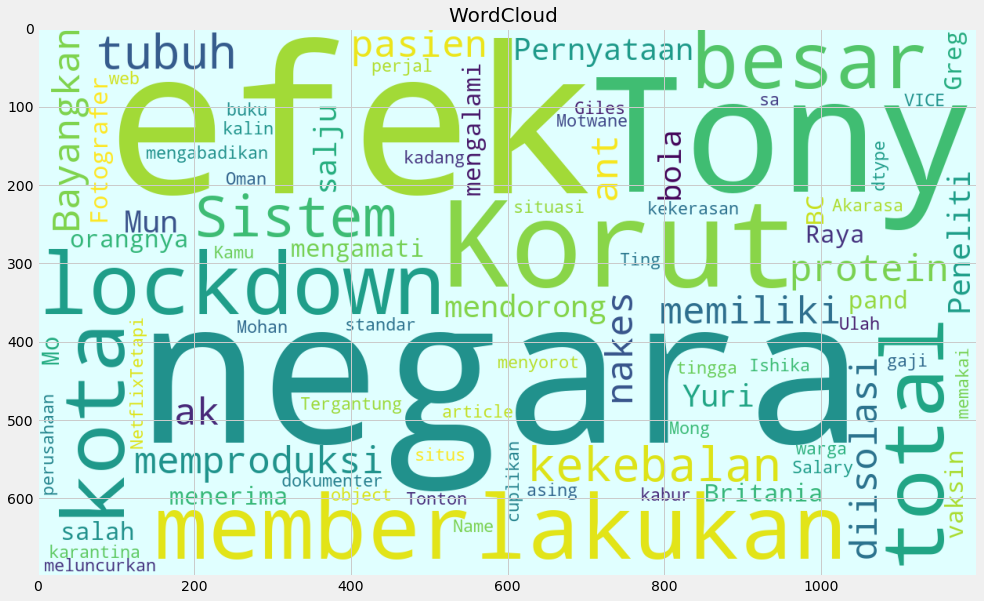

In [15]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(datapd['article']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

# Most Frequently Occuring Words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

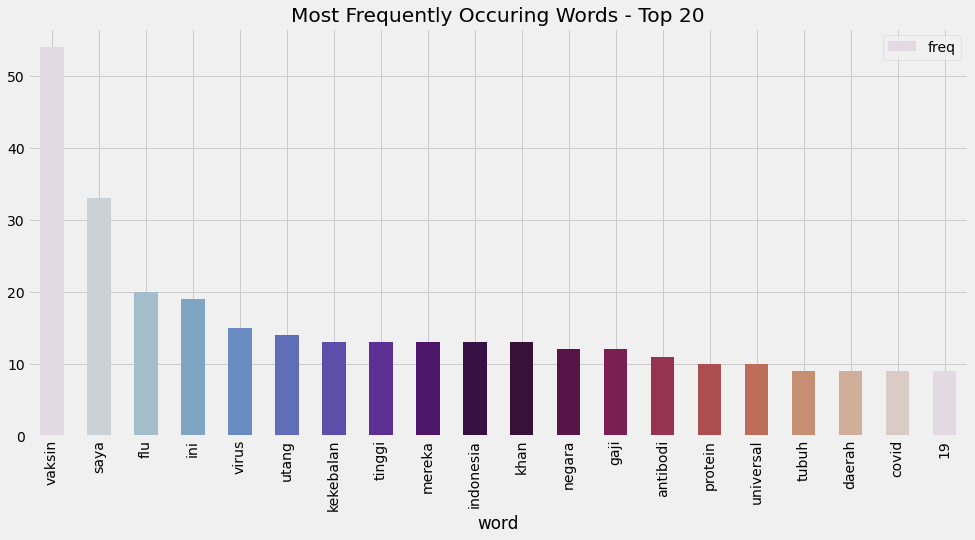

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
words = cv.fit_transform(datapd['article'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [17]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
model.fit(words)

KMeans(max_iter=200, n_clusters=2, n_init=1)

In [18]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")
Y = cv.transform(["covid indonesia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["bencana covid"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Top terms per cluster:
Cluster 0:
 utang
 penagih
 bank
 penagihan
 jemmy
 maluku
 indonesia
 debt
 masyarakat
 yusra
Cluster 1:
 vaksin
 saya
 flu
 ini
 virus
 khan
 tinggi
 mereka
 kekebalan
 gaji


Prediction
Cluster number : [1]
Cluster number : [1]
